In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**1.** 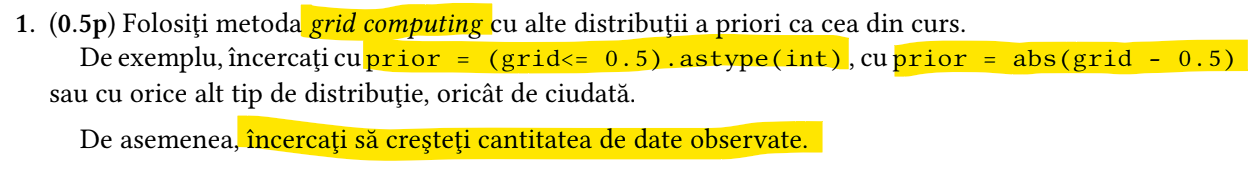

In [53]:
def posterior_grid(grid_points, heads, tails, prior): # Creează o grilă de valori θ între 0 și 1.
    grid = np.linspace(0, 1, grid_points)
    likelihood = stats.binom.pmf(heads, heads + tails, grid) # Calculează verosimilitudinea binomială pentru fiecare valoare θ pe grilă
    posterior = likelihood * prior(grid)
    posterior /= posterior.sum()
    return grid, posterior

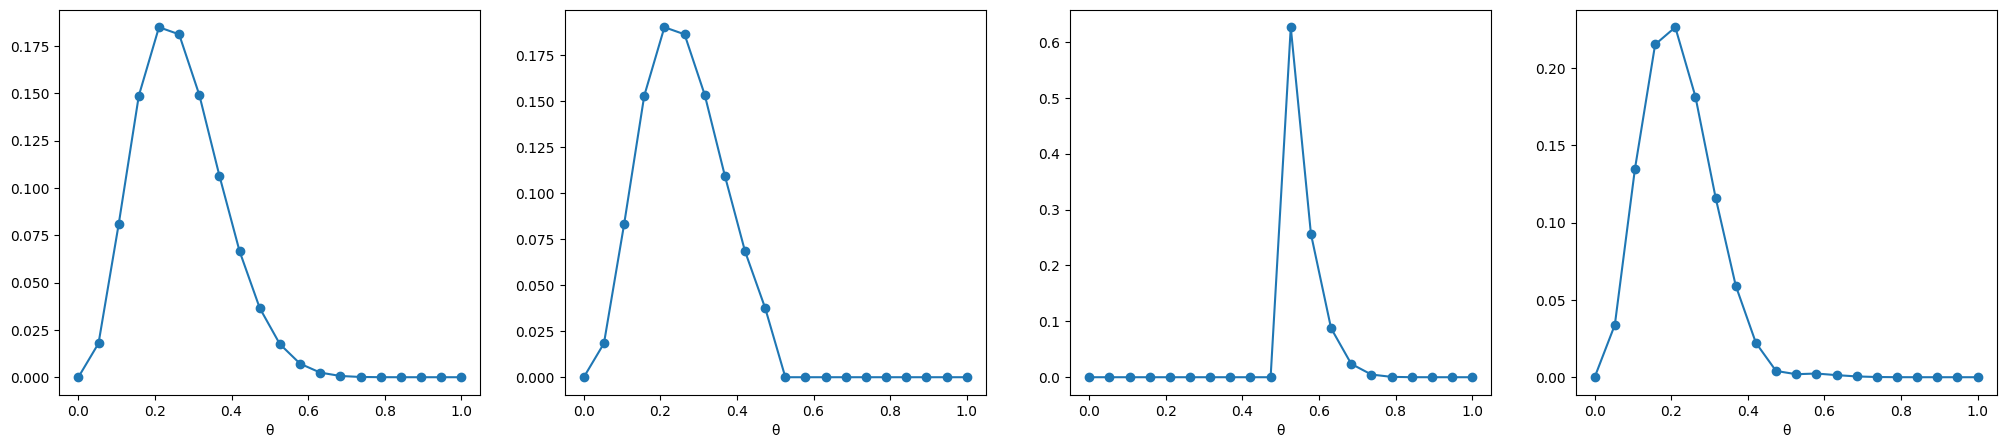

In [63]:
data = np.repeat([0, 1], (10, 3))
points = 20
h = data.sum()
t = len(data) - h
priors = [lambda grid: 1, lambda grid: (grid <= 0.5).astype(int), lambda grid: (grid >= 0.5).astype(int), lambda grid: abs(grid - 0.5)]

plt.figure(figsize=(25, 5))
for i in range(4):
    grid, posterior = posterior_grid(points, h, t, priors[i])
    plt.subplot(1, 4, i+1)
    plt.plot(grid, posterior, 'o-')
    plt.xlabel('θ')

plt.show()

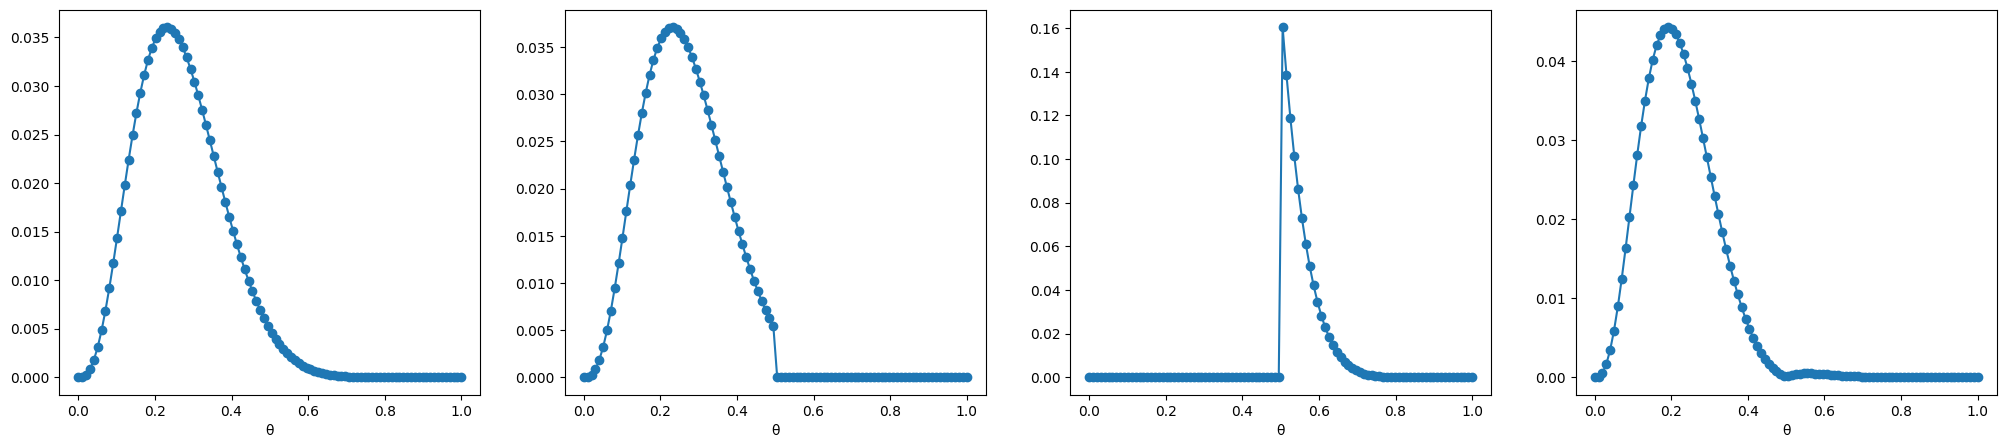

In [64]:
# cresterea nr. de date:

points = 100

plt.figure(figsize=(25, 5))
for i in range(4):
    grid, posterior = posterior_grid(points, h, t, priors[i])
    plt.subplot(1, 4, i+1)
    plt.plot(grid, posterior, 'o-')
    plt.xlabel('θ')

plt.show()

În acest exemplu, se observă cum afectează distribuția a priori pe cea a posteriori; cel mai bine se vede în cea de a treia (funcție suplimentară), unde punctele cuprinse între 0 și 0.5 nu sunt luate în considerare.

**2.** 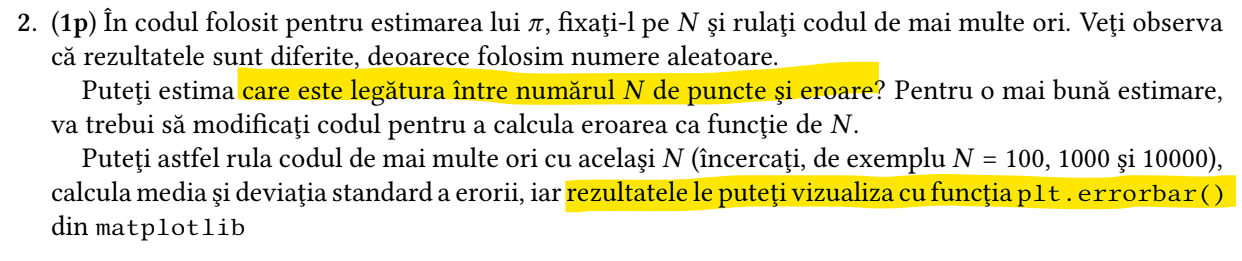

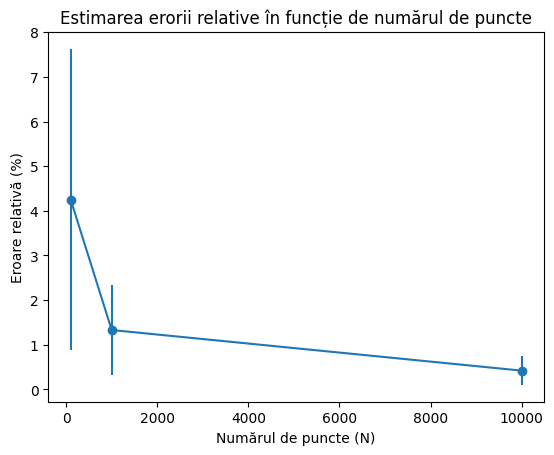

In [72]:
def estimate_pi(N):
    x, y = np.random.uniform(-1, 1, size=(2, N))
    inside = (x ** 2 + y ** 2) <= 1
    pi = inside.sum() * 4 / N

    error = abs((pi - np.pi) / pi) * 100

    return error


runs = 2000
N_values = [100, 1000, 10000]
mean_errors = [0,0,0]
std_errors = [0,0,0]
for i,N in enumerate(N_values):
    estimates = np.arange(0)
    for _ in range(runs):
        estimates = np.concatenate((estimates,(estimate_pi(N),)))
    mean_errors[i] = np.mean(estimates)
    std_errors[i] = np.std(estimates)

plt.errorbar(N_values, mean_errors, yerr=std_errors, fmt='o-')
plt.xlabel('Numărul de puncte (N)')
plt.ylabel('Eroare relativă (%)')
plt.title('Estimarea erorii relative în funcție de numărul de puncte')
plt.show()

Se observă scăderea relativ constantă a erorii relative (atât în medie, cât și în deviație standard), de aproximativ 3 ori de la o valoare a lui  N  la următoarea.

**3.** 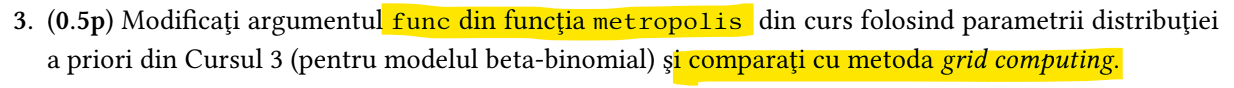

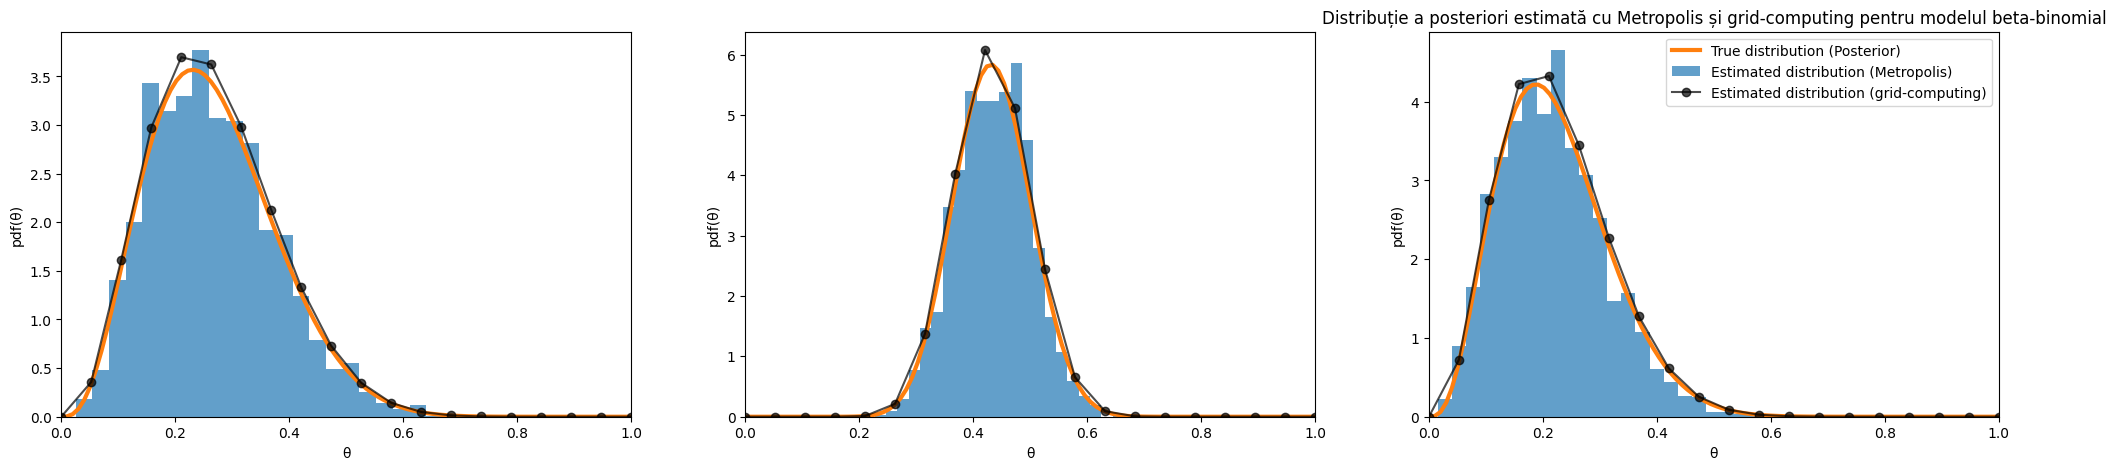

In [78]:
def metropolis(func, draws=10000):
    trace = np.zeros(draws)
    old_x = 0.5 # func.mean()
    old_prob = func.pdf(old_x)
    delta = np.random.normal(0, 0.5, draws)
    for i in range(draws):
        new_x = old_x + delta[i]
        new_prob = func.pdf(new_x)
        acceptance = new_prob / old_prob
        if acceptance >= np.random.random():
            trace[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            trace[i] = old_x
    return trace

y,N = 3,13
grid_points = 20 #parametrii de la pct. 1
beta_params = [(1, 1), (20, 20), (1, 4)]
plt.figure(figsize=(25, 5))
for idx, (a_prior, b_prior) in enumerate(beta_params):
    prior_beta = stats.beta(a_prior, b_prior)
    posterior_beta = stats.beta(a_prior + y, b_prior + N - y) #din cursul 3: cum se modifica distrib. a posteriori in fct. de cea a priori pentru modelul beta-binomial
    trace_metropolis = metropolis(posterior_beta, draws=10000)
    x = np.linspace(0, 1, 100)
    y_posterior = posterior_beta.pdf(x)
    grid, posterior = posterior_grid(grid_points, y, N-y, prior_beta.pdf)
    plt.subplot(1, 3, idx+1)
    plt.plot(x, y_posterior, 'C1-', lw=3, label='True distribution (Posterior)')
    plt.hist(trace_metropolis[trace_metropolis > 0], bins=25, density=True, alpha=0.7,
         label='Estimated distribution (Metropolis)')
    plt.plot(grid, posterior*len(grid), 'o-', color = 'k', alpha = 0.7, label='Estimated distribution (grid-computing)')
    plt.xlabel('θ')
    plt.ylabel('pdf(θ)')
    plt.xlim(0, 1)
plt.title('Distribuție a posteriori estimată cu Metropolis și grid-computing pentru modelul beta-binomial')
plt.legend()
plt.show()